# Task-4 Graduate Rotational Internship Program (GRIP - June 2021) organised by The Sparks Foundation.
### Author: Saurabh Paliwal (Intern June 2021)
# Exploratory Data Analysis on Global Terrorism

### Perform ‘Exploratory Data Analysis’ on ‘Global Terrorism’ dataset.
### Aim: To find out the hot zones of terrorism and derive all security issues and insights.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv(r"../input/global-terrorism/globalterrorismdb_0718dist.csv", encoding='latin1', low_memory=False)

In [3]:
df.tail()

eventid  iyear  imonth  iday approxdate  extended resolution  \
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region  ... addnotes  \
181686      182      Somalia      11  ...      NaN   
181687      200        Syria      10  ...      NaN   
181688      160  Philippines       5  ...      NaN   
181689       92        India       6  ...      NaN   
181690      160  Philippines       5  ...      NaN   

                                                   scite1  \
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
181686  START Primary Collection        0         0        0       0      NaN  
181687  START Primary Collection       -9        -9        1       1      NaN  
181688  START Primary Collection        0         0        0       0      NaN  
181689  START Primary Collection       -9        -9        0      -9      NaN  
181690  START Primary Collection       -9        -9        0      -9      NaN  

[5 rows x 135 columns]

In [4]:
pd.set_option('display.max_columns', 136)
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)

In [6]:
df_terror=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df_terror.tail()

Year  Month  Day      Country            state  \
181686  2017     12   31      Somalia  Middle Shebelle   
181687  2017     12   31        Syria         Lattakia   
181688  2017     12   31  Philippines      Maguindanao   
181689  2017     12   31        India          Manipur   
181690  2017     12   31  Philippines      Maguindanao   

                            Region           city   latitude   longitude  \
181686          Sub-Saharan Africa  Ceelka Geelow   2.359673   45.385034   
181687  Middle East & North Africa         Jableh  35.407278   35.942679   
181688              Southeast Asia       Kubentog   6.900742  124.437908   
181689                  South Asia         Imphal  24.798346   93.940430   
181690              Southeast Asia  Cotabato City   7.209594  124.241966   

                            AttackType  Killed  Wounded            Target  \
181686                   Armed Assault     1.0      2.0        Checkpoint   
181687               Bombing/Explosion     2.0      7.0  Hmeymim Air Base   
181688  Facility/Infrastructure Attack     0.0      0.0            Houses   
181689               Bombing/Explosion     0.0      0.0            Office   
181690               Bombing/Explosion     0.0      0.0           Unknown   

                                                  Summary  \
181686  12/31/2017: Assailants opened fire on a Somali...   
181687  12/31/2017: Assailants launched mortars at the...   
181688  12/31/2017: Assailants set fire to houses in K...   
181689  12/31/2017: Assailants threw a grenade at a Fo...   
181690  12/31/2017: An explosive device was discovered...   

                                             Group  \
181686                                  Al-Shabaab   
181687                           Muslim extremists   
181688  Bangsamoro Islamic Freedom Movement (BIFM)   
181689                                     Unknown   
181690                                     Unknown   

                        Target_type Weapon_type Motive  
181686                     Military    Firearms    NaN  
181687                     Military  Explosives    NaN  
181688  Private Citizens & Property  Incendiary    NaN  
181689         Government (General)  Explosives    NaN  
181690                      Unknown  Explosives    NaN

In [7]:
df_terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [8]:
df_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [9]:
df_terror.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

In [10]:
count = 0
for i in df_terror['Day']:
  if i==0:
    count = count + 1
  else:
    count= count
print("Number of Days with 0 value ", count)

Number of Days with 0 value  891


In [11]:
count1 = 0
for i in df_terror['Month']:
  if i==0:
    count1 = count1 + 1
  else:
    count1 = count1
print("Number of months with 0 value", count1)

Number of months with 0 value 20


In [12]:
df_terror['Day'] = df_terror['Day'].apply(lambda x: np.random.randint(1,33) if x==0 else x)
df_terror['Month'] = df_terror['Month'].apply(lambda x: np.random.randint(1, 13) if x==0 else x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
count = 0
for i in df_terror['Day']:
  if i==0:
    count = count + 1
  else:
    count= count
print("Number of Days with 0 value ", count)

Number of Days with 0 value  0


In [14]:
count1 = 0
for i in df_terror['Month']:
  if i==0:
    count1 = count1 + 1
  else:
    count1 = count1
print("Number of months with 0 value", count1)

Number of months with 0 value 0


In [15]:
df_terror['state'].fillna(value='NA', inplace=True)
df_terror['Summary'].fillna(value='NA', inplace=True)
df_terror['city'].fillna(value='NA', inplace=True)
df_terror['Motive'].fillna(value='NA', inplace=True)
df_terror['Target'].fillna(value='NA', inplace=True)
df_terror['Killed'].fillna(df_terror['Killed'].mean(), inplace=True)
df_terror['Wounded'].fillna(df_terror['Wounded'].mean(), inplace=True)
df_terror['latitude'].fillna(df_terror['latitude'].mean(), inplace=True)
df_terror['longitude'].fillna(df_terror['longitude'].mean(), inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
df_terror.isna().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

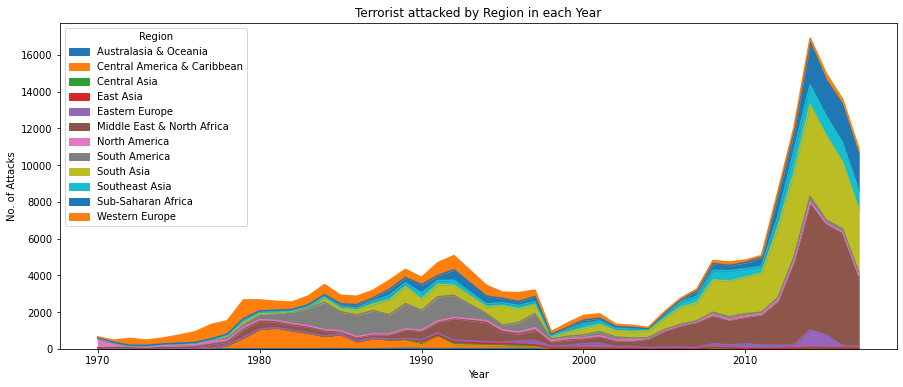

In [17]:
pd.crosstab(df_terror.Year, df_terror.Region).plot(kind='area', figsize=(15,6))
plt.title('Terrorist attacked by Region in each Year')
plt.ylabel('No. of Attacks')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


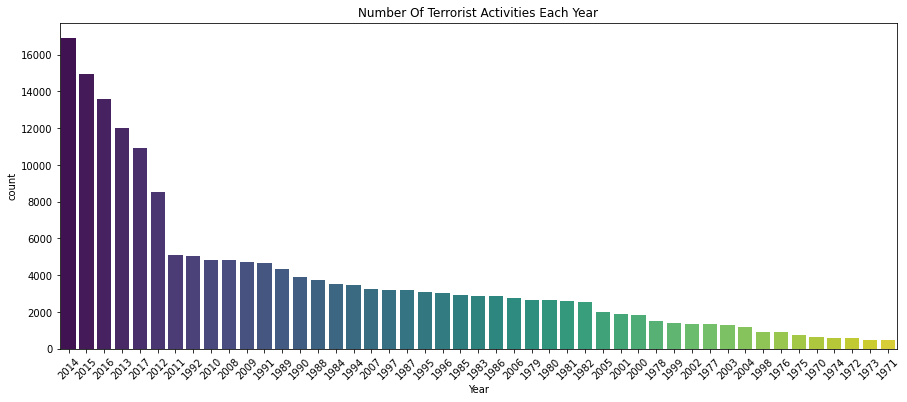

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df_terror,palette="viridis", order=df['Year'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


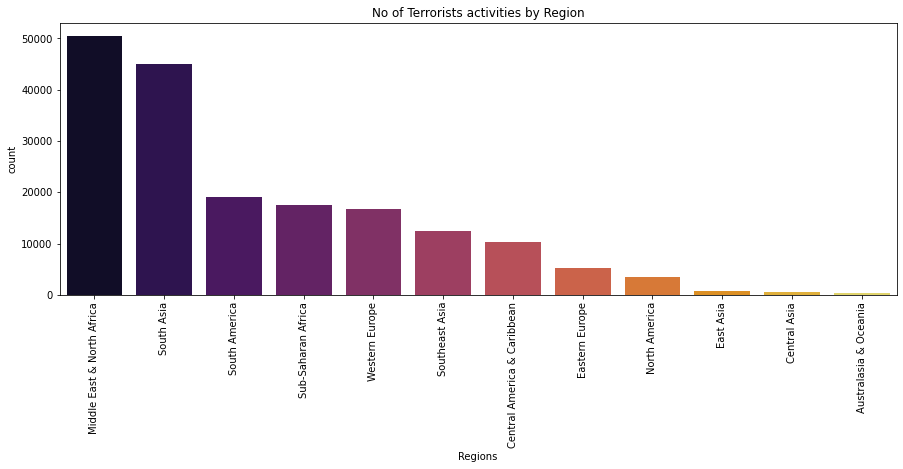

In [19]:
plt.subplots(figsize=(15,5))
sns.countplot('Region', data=df, palette='inferno', order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('No of Terrorists activities by Region')
plt.show()


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


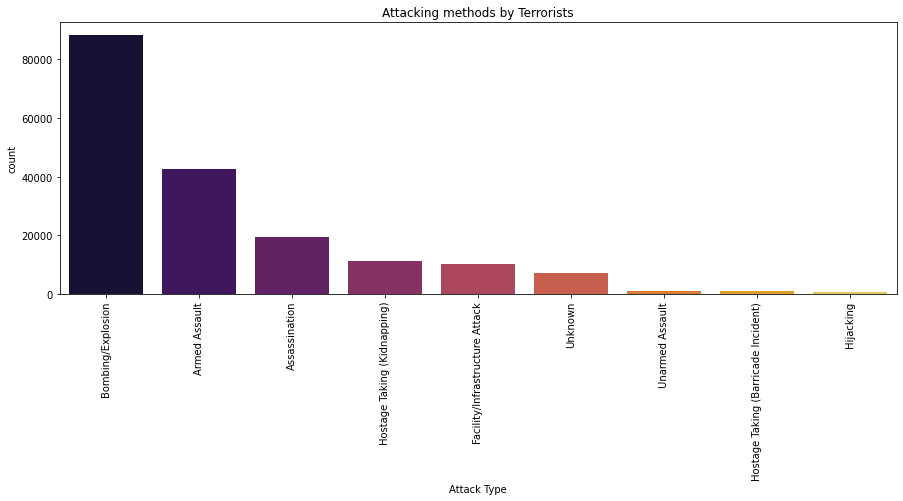

In [20]:
plt.subplots(figsize=(15,5))
sns.countplot("AttackType", data=df_terror, palette='inferno',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking methods by Terrorists')
plt.show()

<AxesSubplot:>

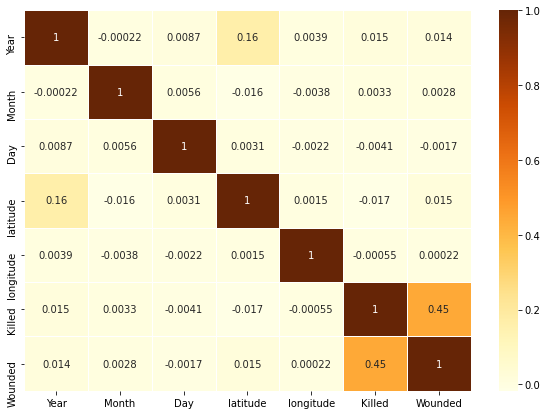

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(df_terror.corr(), cmap="YlOrBr", annot=True, xticklabels='auto', yticklabels='auto', linewidth=1 )

In [22]:
# using piechart to display the number of kills per attack
px.pie(df_terror, values='Killed', names='AttackType', title='Number of killed per attack')

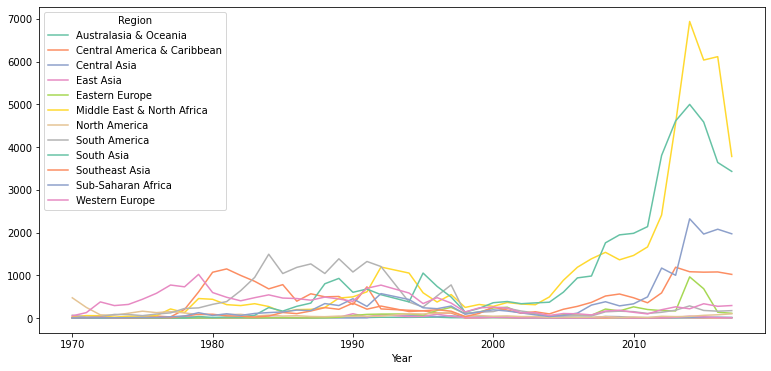

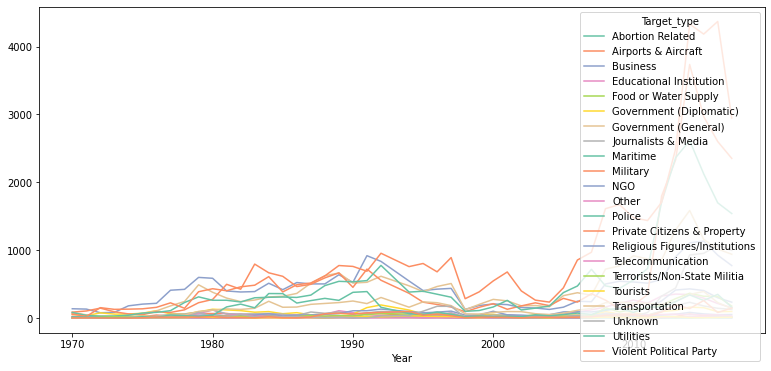

Text(0, 0.5, 'Wounded')

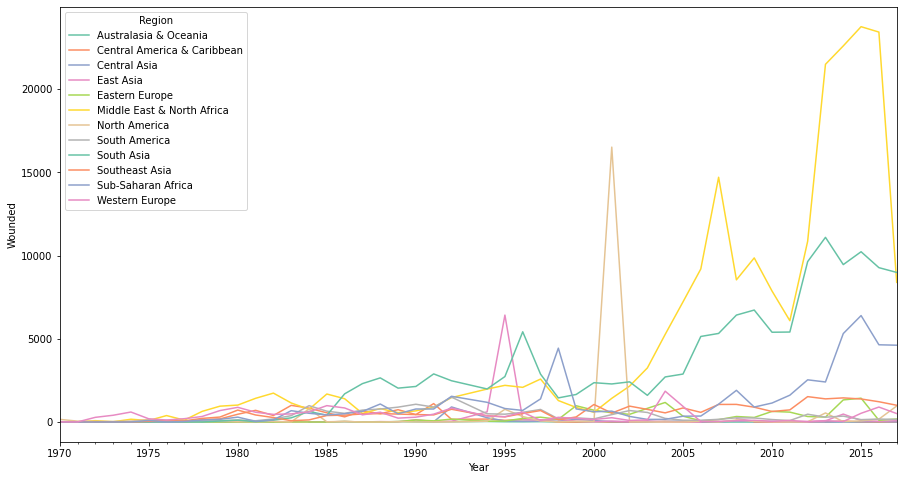

In [23]:
df_region=pd.crosstab(df_terror.Year,df_terror.Region)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.show()

df_region=pd.crosstab(df_terror.Year,df_terror.Target_type)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.show()


d=df.groupby(['Year','Region'])['Wounded'].sum()
plot_df = d.unstack('Region').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')
plot_df.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.xlabel("Year")
plt.ylabel("Wounded")

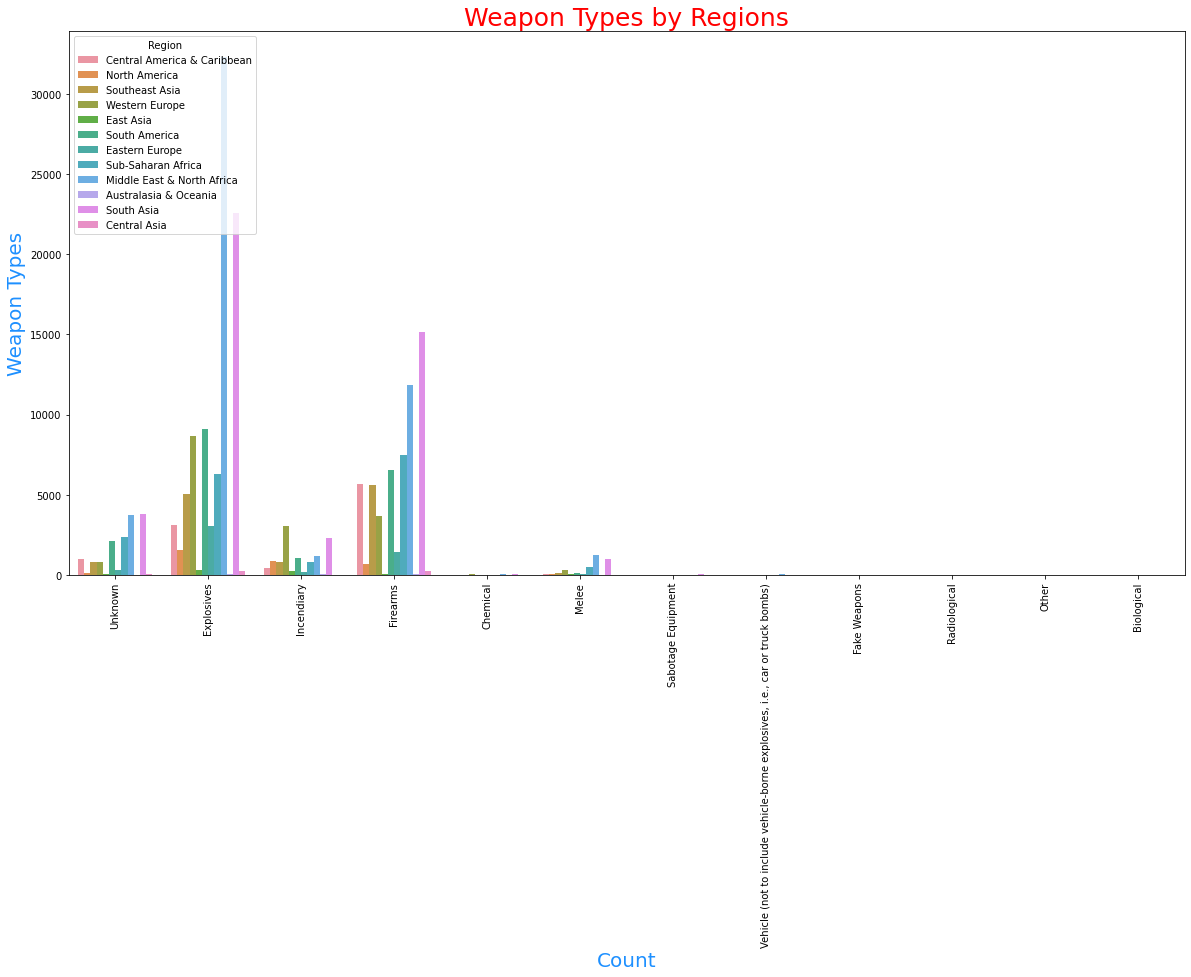

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x="Weapon_type", hue="Region", data=df_terror)
style1  = {'family': 'Times New Roman', 'color': 'Red', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
plt.title("Weapon Types by Regions", fontdict = style1)
plt.ylabel("Weapon Types", fontdict = style2 )
plt.xlabel("Count", fontdict = style2)
plt.xticks(rotation=90)
plt.show()

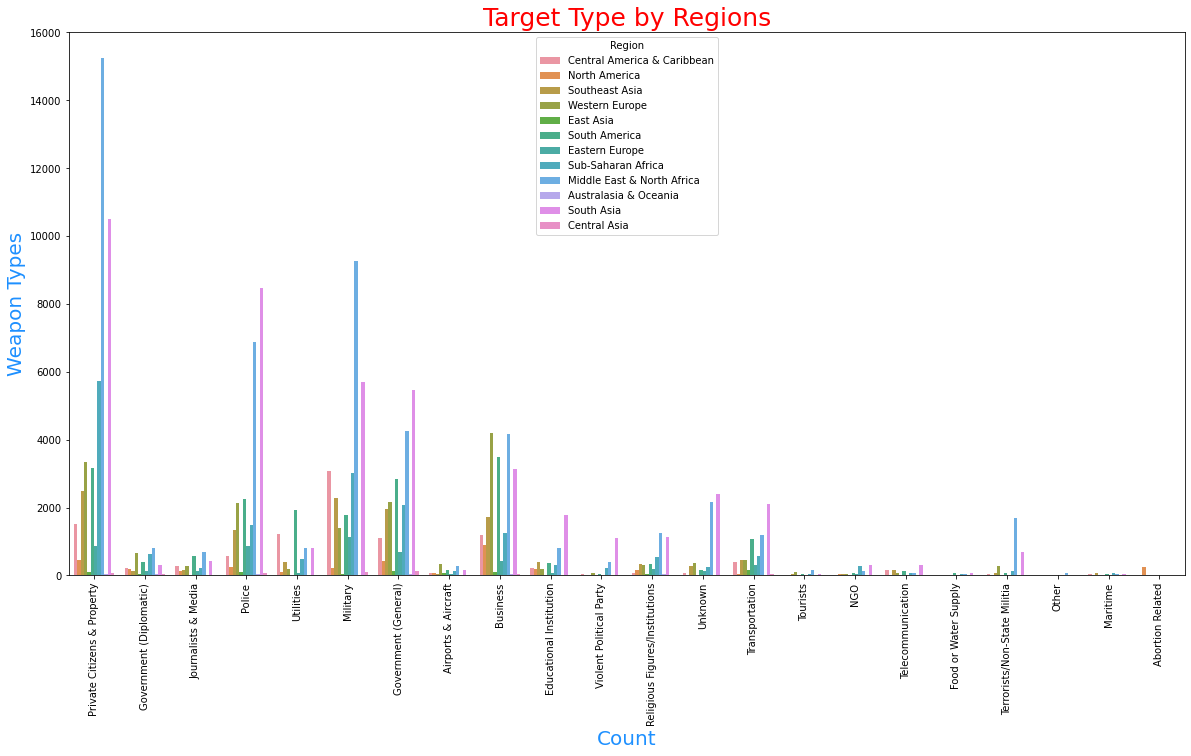

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x="Target_type", hue="Region", data=df_terror)
style1  = {'family': 'Times New Roman', 'color': 'Red', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
plt.title("Target Type by Regions", fontdict = style1)
plt.ylabel("Weapon Types", fontdict = style2 )
plt.xlabel("Count", fontdict = style2)
plt.xticks(rotation=90)
plt.show()

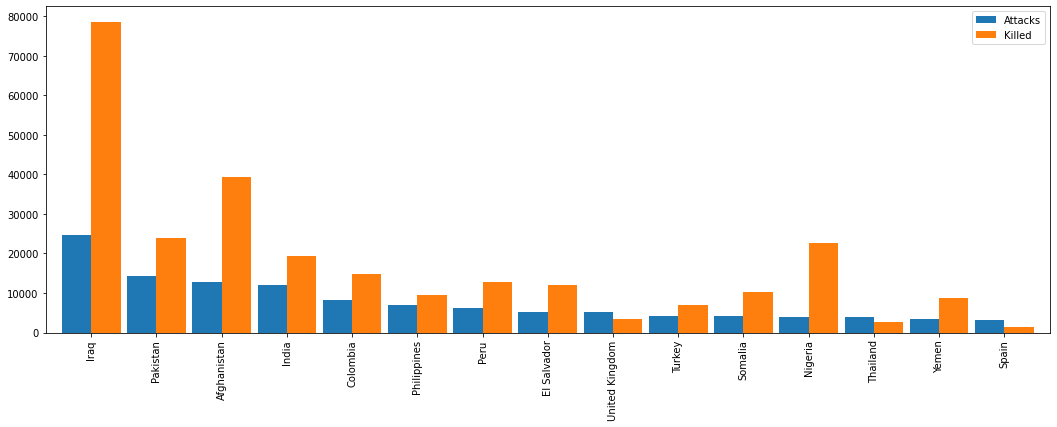

In [26]:
count=df['Country'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('Country')['Killed'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [27]:
df['Casualties'] = df['Killed']+df['Wounded']

In [28]:
df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

In [29]:
print('Countries with highest terrorist attcks:', df['Country'].value_counts().index[0])
print('Regions with highest terrorist attcks:', df['Region'].value_counts().index[0])
print('Max people killed in attacks are:', df['Killed'].value_counts().max(), 'That took placed in:', df.loc[df['Killed'].idxmax()].Country)

Countries with highest terrorist attcks: Iraq
Regions with highest terrorist attcks: Middle East & North Africa
Max people killed in attacks are: 88149 That took placed in: Iraq


In [30]:
from wordcloud import WordCloud, STOPWORDS 
from scipy import signal

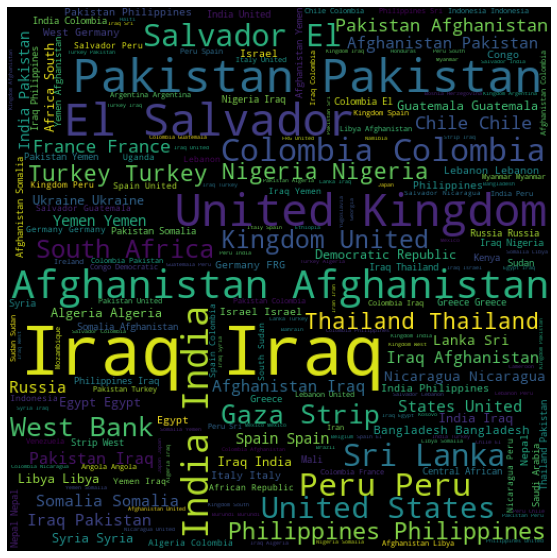

In [31]:
# Genereating wordcloud
Country = df_terror.Country.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black', width = 512, height = 512).generate(' '.join(Country))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


# Conclusion:

* There have been very less terror casualties in: East Asia, North America.
* From 2010 to 2017 Terrorists attacks is at its peak in the Middle East, North Africa, South Asia Region
* No of Terrorists attacks were highest in 2014
* Mostly there is usage of Bombing/Explosions and Arm Assults as Weapons
* No. of Terrorists attacks are least in central Asia and Astralasia & Oceania
* If we look now to the country split, we see that there are few countries where the number of killed    people in terrorist attacks is very large. Some of them have experienced recent massive increase, like Iraq and Syria and Afganistan while others have a long history, like Peru, Colombia, India, Pakistan. 
* Most of the killings were in regions from Irak, Afghanistan, Pakistan, Liban. Also New York, due to the 2001 events, is on this province/states map.
* Iraq and Iran are the countries with most attacked by Terrorists
